In [187]:
import os
import sys
import requests
from importlib import reload
import json
from datetime import datetime

In [154]:
sys.path.append('..') #agregar directorio madre del repo para poder importar librerias customizadas
#importar librerias customizadas

In [172]:
import fhumeres.Elastic_Module
reload(fhumeres.Elastic_Module)


<module 'fhumeres.Elastic_Module' from '../fhumeres/Elastic_Module.py'>

In [173]:
from fhumeres.Elastic_Module import *

In [176]:
import kibana_backup
reload(kibana_backup)


<module 'kibana_backup' from '/home/jovyan/work/kibana/kibana_backup.py'>

In [177]:
from kibana_backup import *

In [15]:
args={}

In [16]:
args['user']='elastic'

In [17]:
args['password']=os.environ['ELASTIC_PASSWORD']

In [148]:
args['kibana_url']='http://kibana:5601'

In [180]:
#args

In [181]:
#ES_HOST = "http://kibana:5601"

In [182]:
#ssl_context={'cafile':"/certs/ca/ca.crt",'user':'elastic','psswd':args['password']}

In [183]:
#res=requests.get(url,data={} ,auth=(ssl_context['user'], ssl_context['psswd']), verify=ssl_context['cafile'],headers={'kbn-xsrf': 'true'})

In [184]:
back=backup(args['kibana_url'], args['user'], args['password'],return_type='json')

{'visualization': {'page': 1,
  'per_page': 20,
  'total': 106,
  'saved_objects': [{'type': 'visualization',
    'id': '37cc8650-b882-11e8-a6d9-e546fe2bba5f',
    'attributes': {'description': '',
     'kibanaSavedObjectMeta': {'searchSourceJSON': '{"query":{"query":"","language":"kuery"},"filter":[],"indexRefName":"kibanaSavedObjectMeta.searchSourceJSON.index"}'},
     'title': '[eCommerce] Sales by Category',
     'uiStateJSON': '{}',
     'version': 1,
     'visState': '{"title":"[eCommerce] Sales by Category","type":"area","params":{"type":"area","grid":{"categoryLines":false,"style":{"color":"#eee"}},"categoryAxes":[{"id":"CategoryAxis-1","type":"category","position":"bottom","show":true,"style":{},"scale":{"type":"linear"},"labels":{"show":true,"truncate":100},"title":{}}],"valueAxes":[{"id":"ValueAxis-1","name":"LeftAxis-1","type":"value","position":"left","show":true,"style":{},"scale":{"type":"linear","mode":"normal"},"labels":{"show":true,"rotate":0,"filter":false,"truncate"
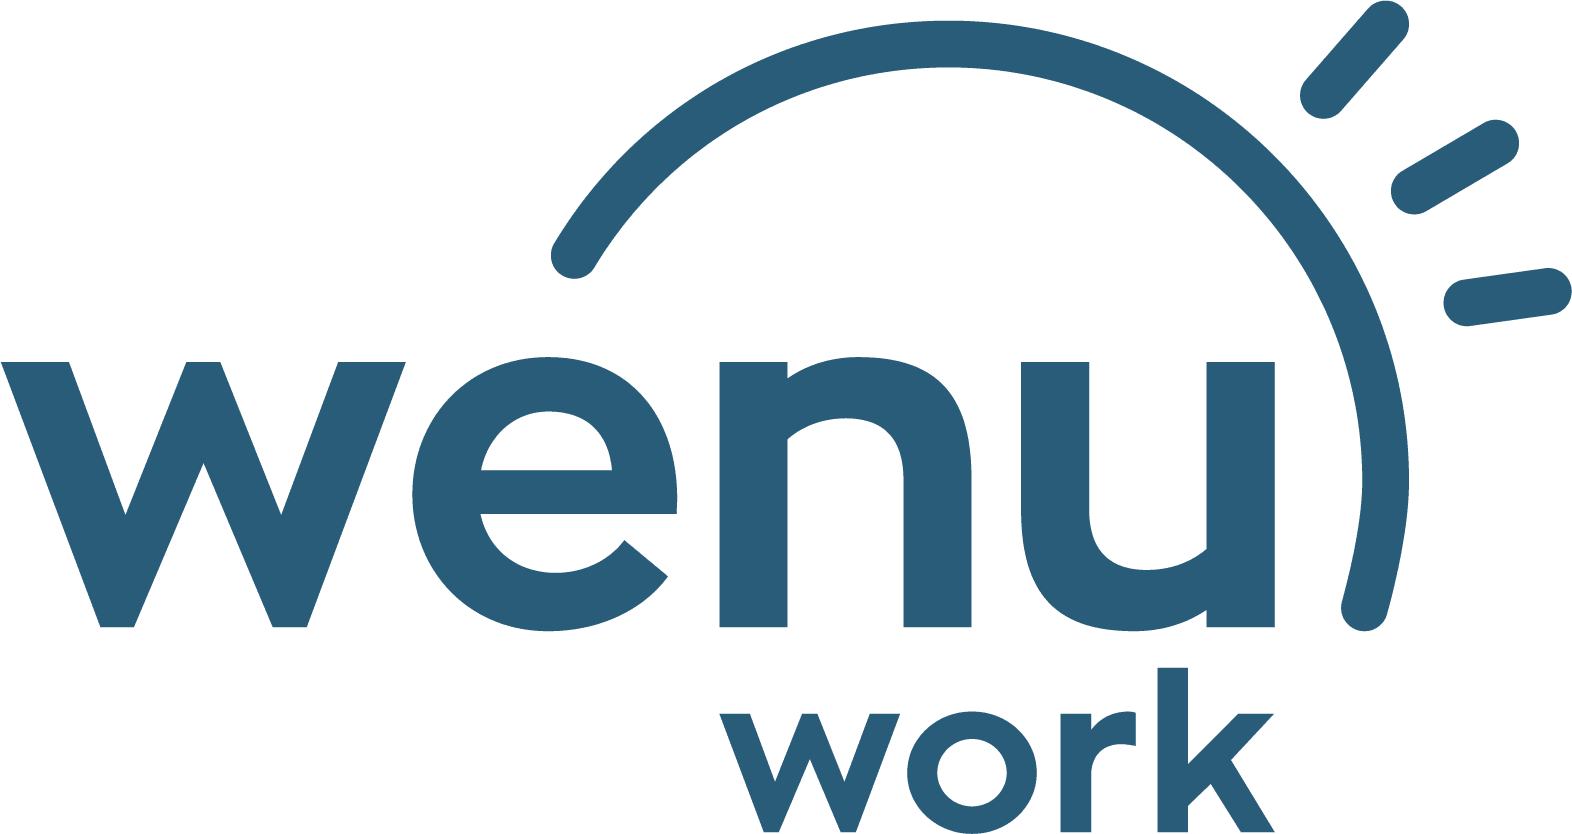

In [185]:
back

In [190]:
now = datetime.now() # current date and time
date_time = now.strftime("%m_%d_%Y__%H_%M_%S")

In [191]:
date_time

'01_27_2020__07_37_17'

In [192]:
with open('backups/kibana_bckp'+date_time+'.json', 'w') as fp:
    json.dump(back, fp)